In [8]:
import pandas as pd

file_path = '/Users/urmebose/Desktop/People/Nuro/sed.csv'
baseline_eye_tracking = pd.read_csv(file_path)

baseline_eye_tracking.rename(columns={
    'datetime': 'timestamp',
    'pupil': 'pupil_dilation',
    'leftEyeOpen': 'left_blink',
    'rightEyeOpen': 'right_blink'
}, inplace=True)


baseline_eye_tracking['timestamp'] = pd.to_datetime(baseline_eye_tracking['timestamp'], errors='coerce').dt.tz_localize(None)
baseline_eye_tracking = baseline_eye_tracking.dropna(subset=['timestamp'])

# start and end times
start_time = baseline_eye_tracking['timestamp'].min()
end_time = baseline_eye_tracking['timestamp'].max()

# Calculate the total duration
total_duration_seconds = (end_time - start_time).total_seconds()
total_duration_minutes = total_duration_seconds / 60

# Calculate average pupil dilation
average_pupil_dilation = baseline_eye_tracking['pupil_dilation'].mean()

# Threshold to detect potential blinks (eye closed state)
blink_detection_threshold = 1.0  # Threshold value to detect closed eyes

# Detect potential blinks
left_blink_count = ((baseline_eye_tracking['left_blink'] > blink_detection_threshold) & 
                    (baseline_eye_tracking['left_blink'].shift(-1) <= blink_detection_threshold)).sum()

right_blink_count = ((baseline_eye_tracking['right_blink'] > blink_detection_threshold) & 
                     (baseline_eye_tracking['right_blink'].shift(-1) <= blink_detection_threshold)).sum()

# Calculate blink rate per minute
left_blink_rate = left_blink_count / total_duration_minutes
right_blink_rate = right_blink_count / total_duration_minutes

# Display the results clearly
print(f"Baseline Metrics:\n")
print(f"  Start Time: {start_time}")
print(f"  End Time: {end_time}")
print(f"  Total Duration: {total_duration_minutes:.2f} minutes")
print(f"  Average Pupil Dilation: {average_pupil_dilation:.2f}")
print(f"  Left Blink Rate: {left_blink_rate:.2f} blinks/min")
print(f"  Right Blink Rate: {right_blink_rate:.2f} blinks/min")

Baseline Metrics:

  Start Time: 2024-06-05 10:44:55.920900
  End Time: 2024-06-05 10:46:42.806900
  Total Duration: 1.78 minutes
  Average Pupil Dilation: 2.51
  Left Blink Rate: 15.72 blinks/min
  Right Blink Rate: 16.84 blinks/min


In [24]:
import pandas as pd

def calculate_eye_tracking_metrics(eye_tracking_data):
    # Convert 'timestamp' column to datetime format and ensure they are tz-naive
    eye_tracking_data['timestamp'] = pd.to_datetime(eye_tracking_data['timestamp'], errors='coerce').dt.tz_localize(None)

    # Remove rows with NaT values in timestamp
    eye_tracking_data = eye_tracking_data.dropna(subset=['timestamp'])

    # Get the start and end times
    start_time = eye_tracking_data['timestamp'].min()
    end_time = eye_tracking_data['timestamp'].max()

    # Calculate the total duration in seconds
    total_duration_seconds = (end_time - start_time).total_seconds()

    # Convert the duration to minutes
    total_duration_minutes = total_duration_seconds / 60

    # Calculate average pupil dilation
    average_pupil_dilation = eye_tracking_data['pupil_dilation'].mean()

    # Define a threshold to detect potential blinks (eye closed state)
    blink_detection_threshold = 1.0  # Threshold value to detect closed eyes

    # Detect potential blinks as transitions from above the threshold to below
    left_blink_count = ((eye_tracking_data['left_blink'] > blink_detection_threshold) & 
                        (eye_tracking_data['left_blink'].shift(-1) <= blink_detection_threshold)).sum()

    right_blink_count = ((eye_tracking_data['right_blink'] > blink_detection_threshold) & 
                         (eye_tracking_data['right_blink'].shift(-1) <= blink_detection_threshold)).sum()

    # Calculate blink rate per minute
    left_blink_rate = left_blink_count / total_duration_minutes
    right_blink_rate = right_blink_count / total_duration_minutes

    return start_time, end_time, total_duration_seconds, total_duration_minutes, average_pupil_dilation, left_blink_rate, right_blink_rate

# Load eye-tracking data for baseline and all three tests
eye_tracking_baseline = pd.read_csv('/Users/urmebose/Desktop/People/Nuro/sed.csv')
eye_tracking_01 = pd.read_csv('/Users/urmebose/Desktop/People/Nuro/sed_01.csv')
eye_tracking_02 = pd.read_csv('/Users/urmebose/Desktop/People/Nuro/sed_02.csv')
eye_tracking_03 = pd.read_csv('/Users/urmebose/Desktop/People/Nuro/sed_03.csv')

# Rename columns based on actual column names
columns_mapping = {
    'datetime': 'timestamp',
    'pupil': 'pupil_dilation',
    'leftEyeOpen': 'left_blink',
    'rightEyeOpen': 'right_blink'
}

eye_tracking_baseline.rename(columns=columns_mapping, inplace=True)
eye_tracking_01.rename(columns=columns_mapping, inplace=True)
eye_tracking_02.rename(columns=columns_mapping, inplace=True)
eye_tracking_03.rename(columns=columns_mapping, inplace=True)

# Calculate metrics for baseline and each test
baseline_metrics = calculate_eye_tracking_metrics(eye_tracking_baseline)
metrics_01 = calculate_eye_tracking_metrics(eye_tracking_01)
metrics_02 = calculate_eye_tracking_metrics(eye_tracking_02)
metrics_03 = calculate_eye_tracking_metrics(eye_tracking_03)

# Create a DataFrame to display the results in a table
results = pd.DataFrame({
    'Test': ['Baseline', 'Test 01', 'Test 02', 'Test 03'],
    'Start Time': [baseline_metrics[0], metrics_01[0], metrics_02[0], metrics_03[0]],
    'End Time': [baseline_metrics[1], metrics_01[1], metrics_02[1], metrics_03[1]],
    'Total Duration (s)': [baseline_metrics[2], metrics_01[2], metrics_02[2], metrics_03[2]],
    'Total Duration (min)': [baseline_metrics[3], metrics_01[3], metrics_02[3], metrics_03[3]],
    'Average Pupil Dilation': [baseline_metrics[4], metrics_01[4], metrics_02[4], metrics_03[4]],
    'Left Blink Rate (blinks/min)': [baseline_metrics[5], metrics_01[5], metrics_02[5], metrics_03[5]],
    'Right Blink Rate (blinks/min)': [baseline_metrics[6], metrics_01[6], metrics_02[6], metrics_03[6]]
})

# Display the results clearly
print(results.to_string(index=False))

    Test                 Start Time                   End Time  Total Duration (s)  Total Duration (min)  Average Pupil Dilation  Left Blink Rate (blinks/min)  Right Blink Rate (blinks/min)
Baseline 2024-06-05 10:44:55.920900 2024-06-05 10:46:42.806900             106.886              1.781433                2.513676                     15.717681                      16.840372
 Test 01 2024-06-13 11:30:10.520900 2024-06-13 11:39:05.498900             534.978              8.916300                2.819938                     17.047430                      21.084979
 Test 02 2024-06-20 09:41:01.850900 2024-06-20 09:47:57.391900             415.541              6.925683                1.936011                     61.510176                      90.676973
 Test 03 2024-06-24 12:48:29.702900 2024-06-24 12:53:52.131900             322.429              5.373817                2.259561                     43.916645                      46.707957


In [29]:
import pandas as pd

def calculate_eye_tracking_metrics(eye_tracking_data):
    # Convert 'timestamp' column to datetime format and ensure they are tz-naive
    eye_tracking_data['timestamp'] = pd.to_datetime(eye_tracking_data['timestamp'], errors='coerce').dt.tz_localize(None)

    # Remove rows with NaT values in timestamp
    eye_tracking_data = eye_tracking_data.dropna(subset=['timestamp'])

    # Get the start and end times
    start_time = eye_tracking_data['timestamp'].min()
    end_time = eye_tracking_data['timestamp'].max()

    # Calculate the total duration in minutes
    total_duration_minutes = (end_time - start_time).total_seconds() / 60

    # Calculate average pupil dilation
    average_pupil_dilation = eye_tracking_data['pupil_dilation'].mean()

    # Define a threshold to detect potential blinks (eye closed state)
    blink_detection_threshold = 1.0  # Threshold value to detect closed eyes

    # Detect potential blinks as transitions from above the threshold to below
    left_blink_count = ((eye_tracking_data['left_blink'] > blink_detection_threshold) & 
                        (eye_tracking_data['left_blink'].shift(-1) <= blink_detection_threshold)).sum()

    right_blink_count = ((eye_tracking_data['right_blink'] > blink_detection_threshold) & 
                         (eye_tracking_data['right_blink'].shift(-1) <= blink_detection_threshold)).sum()

    # Calculate blink rate per minute
    left_blink_rate = left_blink_count / total_duration_minutes
    right_blink_rate = right_blink_count / total_duration_minutes

    return start_time, end_time, total_duration_minutes, average_pupil_dilation, left_blink_rate, right_blink_rate

# Load eye-tracking data for baseline and all three tests
eye_tracking_baseline = pd.read_csv('/Users/urmebose/Desktop/People/Nuro/sed.csv')
eye_tracking_01 = pd.read_csv('/Users/urmebose/Desktop/People/Nuro/sed_01.csv')
eye_tracking_02 = pd.read_csv('/Users/urmebose/Desktop/People/Nuro/sed_02.csv')
eye_tracking_03 = pd.read_csv('/Users/urmebose/Desktop/People/Nuro/sed_03.csv')

# Rename columns based on actual column names
columns_mapping = {
    'datetime': 'timestamp',
    'pupil': 'pupil_dilation',
    'leftEyeOpen': 'left_blink',
    'rightEyeOpen': 'right_blink'
}

eye_tracking_baseline.rename(columns=columns_mapping, inplace=True)
eye_tracking_01.rename(columns=columns_mapping, inplace=True)
eye_tracking_02.rename(columns=columns_mapping, inplace=True)
eye_tracking_03.rename(columns=columns_mapping, inplace=True)

# Calculate metrics for baseline and each test
baseline_metrics = calculate_eye_tracking_metrics(eye_tracking_baseline)
metrics_01 = calculate_eye_tracking_metrics(eye_tracking_01)
metrics_02 = calculate_eye_tracking_metrics(eye_tracking_02)
metrics_03 = calculate_eye_tracking_metrics(eye_tracking_03)

# Create a DataFrame to display the results in a table
results = pd.DataFrame({
    'Test': ['Baseline', 'Test 01', 'Test 02', 'Test 03'],
    'Start Time': [baseline_metrics[0], metrics_01[0], metrics_02[0], metrics_03[0]],
    'End Time': [baseline_metrics[1], metrics_01[1], metrics_02[1], metrics_03[1]],
    'Total Duration (min)': [baseline_metrics[2], metrics_01[2], metrics_02[2], metrics_03[2]],
    'Average Pupil Dilation': [baseline_metrics[3], metrics_01[3], metrics_02[3], metrics_03[3]],
    'Left Blink Rate (blinks/min)': [baseline_metrics[4], metrics_01[4], metrics_02[4], metrics_03[4]],
    'Right Blink Rate (blinks/min)': [baseline_metrics[5], metrics_01[5], metrics_02[5], metrics_03[5]]
})

# Display the results clearly
for index, row in results.iterrows():
    print(f"{row['Test']}:")
    print(f"  Start Time: {row['Start Time']}")
    print(f"  End Time: {row['End Time']}")
    print(f"  Total Duration: {row['Total Duration (min)']:.2f} minutes")
    print(f"  Average Pupil Dilation: {row['Average Pupil Dilation']:.2f}")
    print(f"  Left Blink Rate: {row['Left Blink Rate (blinks/min)']:.2f} blinks/min")
    print(f"  Right Blink Rate: {row['Right Blink Rate (blinks/min)']:.2f} blinks/min\n")

Baseline:
  Start Time: 2024-06-05 10:44:55.920900
  End Time: 2024-06-05 10:46:42.806900
  Total Duration: 1.78 minutes
  Average Pupil Dilation: 2.51
  Left Blink Rate: 15.72 blinks/min
  Right Blink Rate: 16.84 blinks/min

Test 01:
  Start Time: 2024-06-13 11:30:10.520900
  End Time: 2024-06-13 11:39:05.498900
  Total Duration: 8.92 minutes
  Average Pupil Dilation: 2.82
  Left Blink Rate: 17.05 blinks/min
  Right Blink Rate: 21.08 blinks/min

Test 02:
  Start Time: 2024-06-20 09:41:01.850900
  End Time: 2024-06-20 09:47:57.391900
  Total Duration: 6.93 minutes
  Average Pupil Dilation: 1.94
  Left Blink Rate: 61.51 blinks/min
  Right Blink Rate: 90.68 blinks/min

Test 03:
  Start Time: 2024-06-24 12:48:29.702900
  End Time: 2024-06-24 12:53:52.131900
  Total Duration: 5.37 minutes
  Average Pupil Dilation: 2.26
  Left Blink Rate: 43.92 blinks/min
  Right Blink Rate: 46.71 blinks/min



Eye-Tracking Metrics:
Baseline Metrics:
  Start Time: 2024-06-05 10:44:55.920900
  End Time: 2024-06-05 10:46:42.806900
  Total Duration: 1.78 minutes
  Average Pupil Dilation: 2.51
  Left Blink Rate: 15.72 blinks/min
  Right Blink Rate: 16.84 blinks/min

Test 01 Metrics:
  Start Time: 2024-06-13 11:30:10.520900
  End Time: 2024-06-13 11:39:05.498900
  Total Duration: 8.92 minutes
  Average Pupil Dilation: 2.82
  Left Blink Rate: 17.05 blinks/min
  Right Blink Rate: 21.08 blinks/min

Test 02 Metrics:
  Start Time: 2024-06-20 09:41:01.850900
  End Time: 2024-06-20 09:47:57.391900
  Total Duration: 6.93 minutes
  Average Pupil Dilation: 1.94
  Left Blink Rate: 61.51 blinks/min
  Right Blink Rate: 90.68 blinks/min

Test 03 Metrics:
  Start Time: 2024-06-24 12:48:29.702900
  End Time: 2024-06-24 12:53:52.131900
  Total Duration: 5.37 minutes
  Average Pupil Dilation: 2.26
  Left Blink Rate: 43.92 blinks/min
  Right Blink Rate: 46.71 blinks/min



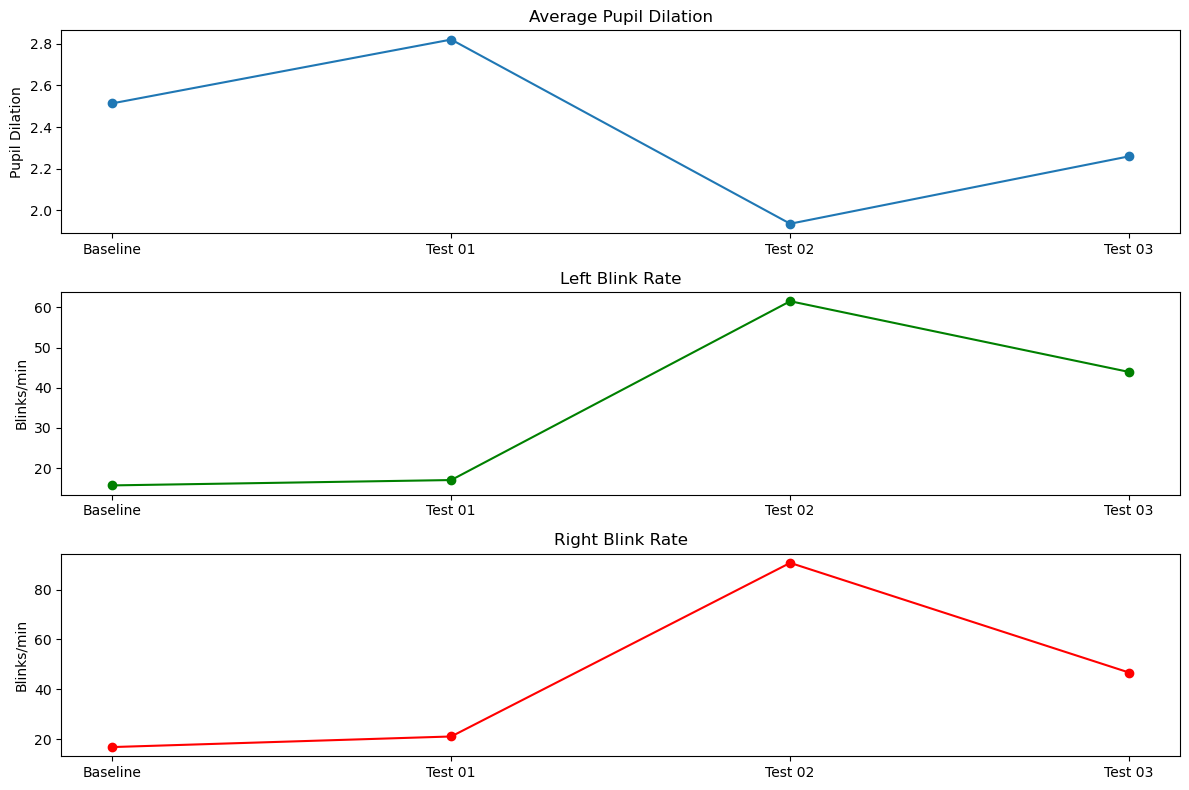

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_eye_tracking_metrics(eye_tracking_data):
    # Convert 'timestamp' column to datetime format and ensure they are tz-naive
    eye_tracking_data['timestamp'] = pd.to_datetime(eye_tracking_data['timestamp'], errors='coerce').dt.tz_localize(None)

    # Remove rows with NaT values in timestamp
    eye_tracking_data = eye_tracking_data.dropna(subset=['timestamp'])

    # Get the start and end times
    start_time = eye_tracking_data['timestamp'].min()
    end_time = eye_tracking_data['timestamp'].max()

    # Calculate the total duration in minutes
    total_duration_minutes = (end_time - start_time).total_seconds() / 60

    # Calculate average pupil dilation
    average_pupil_dilation = eye_tracking_data['pupil_dilation'].mean()

    # Define a threshold to detect potential blinks (eye closed state)
    blink_detection_threshold = 1.0  # Threshold value to detect closed eyes

    # Detect potential blinks as transitions from above the threshold to below
    left_blink_count = ((eye_tracking_data['left_blink'] > blink_detection_threshold) & 
                        (eye_tracking_data['left_blink'].shift(-1) <= blink_detection_threshold)).sum()

    right_blink_count = ((eye_tracking_data['right_blink'] > blink_detection_threshold) & 
                         (eye_tracking_data['right_blink'].shift(-1) <= blink_detection_threshold)).sum()

    # Calculate blink rate per minute
    left_blink_rate = left_blink_count / total_duration_minutes
    right_blink_rate = right_blink_count / total_duration_minutes

    return start_time, end_time, total_duration_minutes, average_pupil_dilation, left_blink_rate, right_blink_rate

# Load eye-tracking data for baseline and all three tests
eye_tracking_baseline = pd.read_csv('/Users/urmebose/Desktop/People/Nuro/sed.csv')
eye_tracking_01 = pd.read_csv('/Users/urmebose/Desktop/People/Nuro/sed_01.csv')
eye_tracking_02 = pd.read_csv('/Users/urmebose/Desktop/People/Nuro/sed_02.csv')
eye_tracking_03 = pd.read_csv('/Users/urmebose/Desktop/People/Nuro/sed_03.csv')

# Rename columns based on actual column names
columns_mapping = {
    'datetime': 'timestamp',
    'pupil': 'pupil_dilation',
    'leftEyeOpen': 'left_blink',
    'rightEyeOpen': 'right_blink'
}

eye_tracking_baseline.rename(columns=columns_mapping, inplace=True)
eye_tracking_01.rename(columns=columns_mapping, inplace=True)
eye_tracking_02.rename(columns=columns_mapping, inplace=True)
eye_tracking_03.rename(columns=columns_mapping, inplace=True)

# Calculate metrics for baseline and each test
baseline_metrics = calculate_eye_tracking_metrics(eye_tracking_baseline)
metrics_01 = calculate_eye_tracking_metrics(eye_tracking_01)
metrics_02 = calculate_eye_tracking_metrics(eye_tracking_02)
metrics_03 = calculate_eye_tracking_metrics(eye_tracking_03)

# Create a DataFrame to display the results in a table
results = pd.DataFrame({
    'Test': ['Baseline', 'Test 01', 'Test 02', 'Test 03'],
    'Start Time': [baseline_metrics[0], metrics_01[0], metrics_02[0], metrics_03[0]],
    'End Time': [baseline_metrics[1], metrics_01[1], metrics_02[1], metrics_03[1]],
    'Total Duration (min)': [baseline_metrics[2], metrics_01[2], metrics_02[2], metrics_03[2]],
    'Average Pupil Dilation': [baseline_metrics[3], metrics_01[3], metrics_02[3], metrics_03[3]],
    'Left Blink Rate (blinks/min)': [baseline_metrics[4], metrics_01[4], metrics_02[4], metrics_03[4]],
    'Right Blink Rate (blinks/min)': [baseline_metrics[5], metrics_01[5], metrics_02[5], metrics_03[5]]
})

# Display the results clearly
print("Eye-Tracking Metrics:")
for index, row in results.iterrows():
    print(f"{row['Test']} Metrics:")
    print(f"  Start Time: {row['Start Time']}")
    print(f"  End Time: {row['End Time']}")
    print(f"  Total Duration: {row['Total Duration (min)']:.2f} minutes")
    print(f"  Average Pupil Dilation: {row['Average Pupil Dilation']:.2f}")
    print(f"  Left Blink Rate: {row['Left Blink Rate (blinks/min)']:.2f} blinks/min")
    print(f"  Right Blink Rate: {row['Right Blink Rate (blinks/min)']:.2f} blinks/min\n")

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot Average Pupil Dilation
plt.subplot(3, 1, 1)
plt.plot(results['Test'], results['Average Pupil Dilation'], marker='o', linestyle='-')
plt.title('Average Pupil Dilation')
plt.ylabel('Pupil Dilation')

# Plot Left Blink Rate
plt.subplot(3, 1, 2)
plt.plot(results['Test'], results['Left Blink Rate (blinks/min)'], marker='o', linestyle='-', color='green')
plt.title('Left Blink Rate')
plt.ylabel('Blinks/min')

# Plot Right Blink Rate
plt.subplot(3, 1, 3)
plt.plot(results['Test'], results['Right Blink Rate (blinks/min)'], marker='o', linestyle='-', color='red')
plt.title('Right Blink Rate')
plt.ylabel('Blinks/min')

plt.tight_layout()
plt.show()

Eye-Tracking Metrics:
Baseline Metrics:
  Start Time: 2024-06-05 10:44:55.920900
  End Time: 2024-06-05 10:46:42.806900
  Total Duration: 1.78 minutes
  Average Pupil Dilation: 2.51
  Left Blink Rate: 15.72 blinks/min
  Right Blink Rate: 16.84 blinks/min

Test 01 Metrics:
  Start Time: 2024-06-13 11:30:10.520900
  End Time: 2024-06-13 11:39:05.498900
  Total Duration: 8.92 minutes
  Average Pupil Dilation: 2.82
  Left Blink Rate: 17.05 blinks/min
  Right Blink Rate: 21.08 blinks/min

Test 02 Metrics:
  Start Time: 2024-06-20 09:41:01.850900
  End Time: 2024-06-20 09:47:57.391900
  Total Duration: 6.93 minutes
  Average Pupil Dilation: 1.94
  Left Blink Rate: 61.51 blinks/min
  Right Blink Rate: 90.68 blinks/min

Test 03 Metrics:
  Start Time: 2024-06-24 12:48:29.702900
  End Time: 2024-06-24 12:53:52.131900
  Total Duration: 5.37 minutes
  Average Pupil Dilation: 2.26
  Left Blink Rate: 43.92 blinks/min
  Right Blink Rate: 46.71 blinks/min



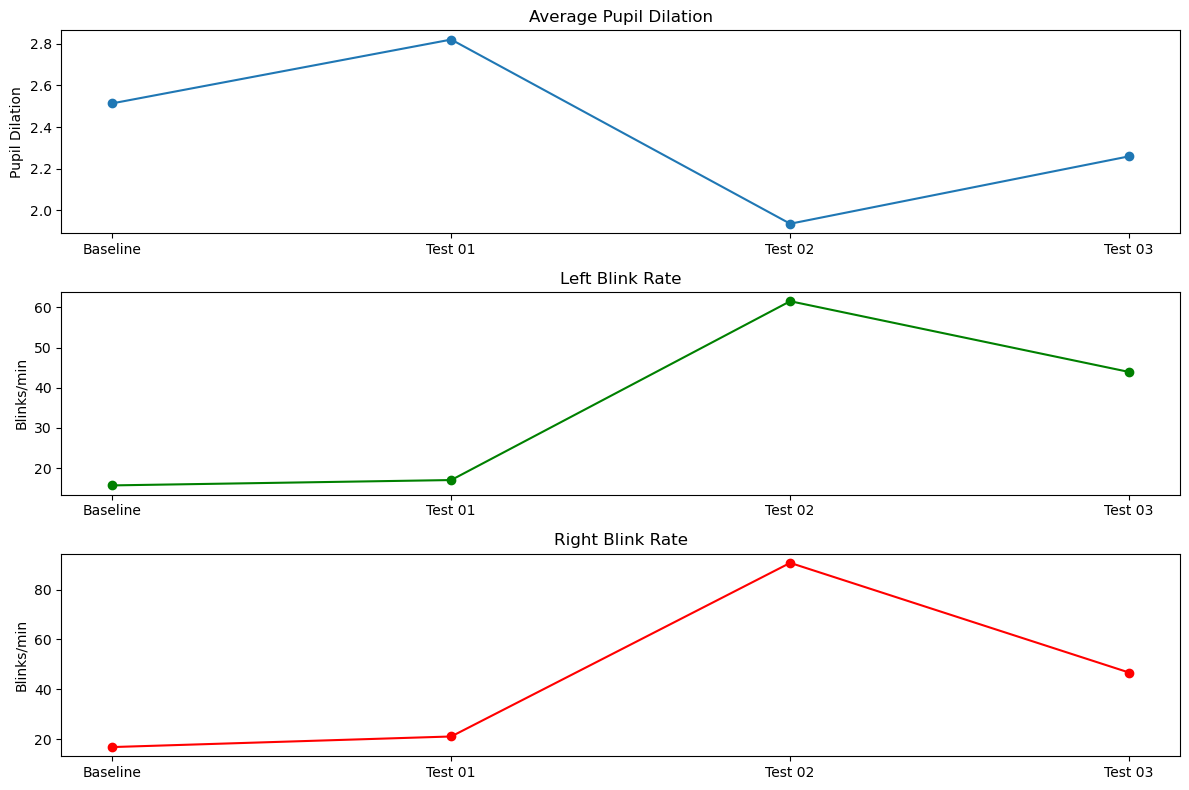

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
eye_tracking_baseline = pd.read_csv('/Users/urmebose/Desktop/People/Nuro/sed.csv')
eye_tracking_01 = pd.read_csv('/Users/urmebose/Desktop/People/Nuro/sed_01.csv')
eye_tracking_02 = pd.read_csv('/Users/urmebose/Desktop/People/Nuro/sed_02.csv')
eye_tracking_03 = pd.read_csv('/Users/urmebose/Desktop/People/Nuro/sed_03.csv')

# Step 2: Rename columns for consistency
columns_mapping = {
    'datetime': 'timestamp',
    'pupil': 'pupil_dilation',
    'leftEyeOpen': 'left_blink',
    'rightEyeOpen': 'right_blink'
}

eye_tracking_baseline.rename(columns=columns_mapping, inplace=True)
eye_tracking_01.rename(columns=columns_mapping, inplace=True)
eye_tracking_02.rename(columns=columns_mapping, inplace=True)
eye_tracking_03.rename(columns=columns_mapping, inplace=True)

# Step 3: Clean the data
def clean_eye_tracking_data(eye_tracking_data):
    # Convert 'timestamp' column to datetime format and ensure they are tz-naive
    eye_tracking_data['timestamp'] = pd.to_datetime(eye_tracking_data['timestamp'], errors='coerce').dt.tz_localize(None)
    # Remove rows with NaT values in timestamp
    eye_tracking_data = eye_tracking_data.dropna(subset=['timestamp'])
    return eye_tracking_data

eye_tracking_baseline = clean_eye_tracking_data(eye_tracking_baseline)
eye_tracking_01 = clean_eye_tracking_data(eye_tracking_01)
eye_tracking_02 = clean_eye_tracking_data(eye_tracking_02)
eye_tracking_03 = clean_eye_tracking_data(eye_tracking_03)

# Step 4: Define function to calculate metrics
def calculate_eye_tracking_metrics(eye_tracking_data):
    # Get the start and end times
    start_time = eye_tracking_data['timestamp'].min()
    end_time = eye_tracking_data['timestamp'].max()

    # Calculate the total duration in minutes
    total_duration_minutes = (end_time - start_time).total_seconds() / 60

    # Calculate average pupil dilation
    average_pupil_dilation = eye_tracking_data['pupil_dilation'].mean()

    # Define a threshold to detect potential blinks (eye closed state)
    blink_detection_threshold = 1.0  # Threshold value to detect closed eyes

    # Detect potential blinks as transitions from above the threshold to below
    left_blink_count = ((eye_tracking_data['left_blink'] > blink_detection_threshold) & 
                        (eye_tracking_data['left_blink'].shift(-1) <= blink_detection_threshold)).sum()

    right_blink_count = ((eye_tracking_data['right_blink'] > blink_detection_threshold) & 
                         (eye_tracking_data['right_blink'].shift(-1) <= blink_detection_threshold)).sum()

    # Calculate blink rate per minute
    left_blink_rate = left_blink_count / total_duration_minutes
    right_blink_rate = right_blink_count / total_duration_minutes

    return start_time, end_time, total_duration_minutes, average_pupil_dilation, left_blink_rate, right_blink_rate

# Step 5: Calculate metrics for baseline and each test
baseline_metrics = calculate_eye_tracking_metrics(eye_tracking_baseline)
metrics_01 = calculate_eye_tracking_metrics(eye_tracking_01)
metrics_02 = calculate_eye_tracking_metrics(eye_tracking_02)
metrics_03 = calculate_eye_tracking_metrics(eye_tracking_03)

# Step 6: Create a DataFrame to display the results in a table
results = pd.DataFrame({
    'Test': ['Baseline', 'Test 01', 'Test 02', 'Test 03'],
    'Start Time': [baseline_metrics[0], metrics_01[0], metrics_02[0], metrics_03[0]],
    'End Time': [baseline_metrics[1], metrics_01[1], metrics_02[1], metrics_03[1]],
    'Total Duration (min)': [baseline_metrics[2], metrics_01[2], metrics_02[2], metrics_03[2]],
    'Average Pupil Dilation': [baseline_metrics[3], metrics_01[3], metrics_02[3], metrics_03[3]],
    'Left Blink Rate (blinks/min)': [baseline_metrics[4], metrics_01[4], metrics_02[4], metrics_03[4]],
    'Right Blink Rate (blinks/min)': [baseline_metrics[5], metrics_01[5], metrics_02[5], metrics_03[5]]
})

# Step 7: Display the results clearly
print("Eye-Tracking Metrics:")
for index, row in results.iterrows():
    print(f"{row['Test']} Metrics:")
    print(f"  Start Time: {row['Start Time']}")
    print(f"  End Time: {row['End Time']}")
    print(f"  Total Duration: {row['Total Duration (min)']:.2f} minutes")
    print(f"  Average Pupil Dilation: {row['Average Pupil Dilation']:.2f}")
    print(f"  Left Blink Rate: {row['Left Blink Rate (blinks/min)']:.2f} blinks/min")
    print(f"  Right Blink Rate: {row['Right Blink Rate (blinks/min)']:.2f} blinks/min\n")

# Step 8: Plotting the results
plt.figure(figsize=(12, 8))

# Plot Average Pupil Dilation
plt.subplot(3, 1, 1)
plt.plot(results['Test'], results['Average Pupil Dilation'], marker='o', linestyle='-')
plt.title('Average Pupil Dilation')
plt.ylabel('Pupil Dilation')

# Plot Left Blink Rate
plt.subplot(3, 1, 2)
plt.plot(results['Test'], results['Left Blink Rate (blinks/min)'], marker='o', linestyle='-', color='green')
plt.title('Left Blink Rate')
plt.ylabel('Blinks/min')

# Plot Right Blink Rate
plt.subplot(3, 1, 3)
plt.plot(results['Test'], results['Right Blink Rate (blinks/min)'], marker='o', linestyle='-', color='red')
plt.title('Right Blink Rate')
plt.ylabel('Blinks/min')

plt.tight_layout()
plt.show()